# Regresion Lineal

## Data Set

Para esta **Regresión Lineal** vamos a utilizar el dataset de muestra *car_crashes* de la libreria ```Seaborn```.

Este conjunto de datos incluye información sobre accidentes automovilísticos que ocurrieron en diferentes estados de los Estados Unidos.

* total: *La tasa total de accidentes automovilísticos por cada 10,000 habitantes en el estado.*
* speeding: *La proporción de accidentes en los que se informó que el conductor estaba excediendo el límite de velocidad.*
* alcohol: *La proporción de accidentes en los que se informó que el conductor había consumido alcohol.*
* not_distracted: *La proporción de accidentes en los que no se informó que el conductor estaba distraído.*
* no_previous: *La proporción de accidentes en los que el conductor no había estado involucrado en un accidente anterior.*
* ins_premium: *El costo promedio del seguro de automóvil en el estado.*
* ins_losses: *Las pérdidas promedio pagadas por las compañías de seguros por cada vehículo asegurado en el estado.*

In [1]:
import seaborn as sns

# Cargar los datos del dataset "car_crashes"
data = sns.load_dataset("car_crashes")

In [21]:
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,18.8,7.332,5.640,18.048,15.040,7.297137,9.338213
1,18.1,7.421,4.525,16.290,17.014,9.743587,8.741052
2,18.6,6.510,5.208,15.624,17.856,8.342562,7.478175
3,22.4,4.032,5.824,21.056,21.280,7.686397,9.194144
4,12.0,4.200,3.360,10.920,10.680,8.150979,10.438811


In [3]:
obs = str(data.shape[0])
print('Total Observaciones: ' + obs) 
feat = str(data.shape[1])
print('Total Features: ' + feat)

Total Observaciones: 51
Total Features: 8


In [6]:
data.isnull().sum()

total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

## Analizando los Datos

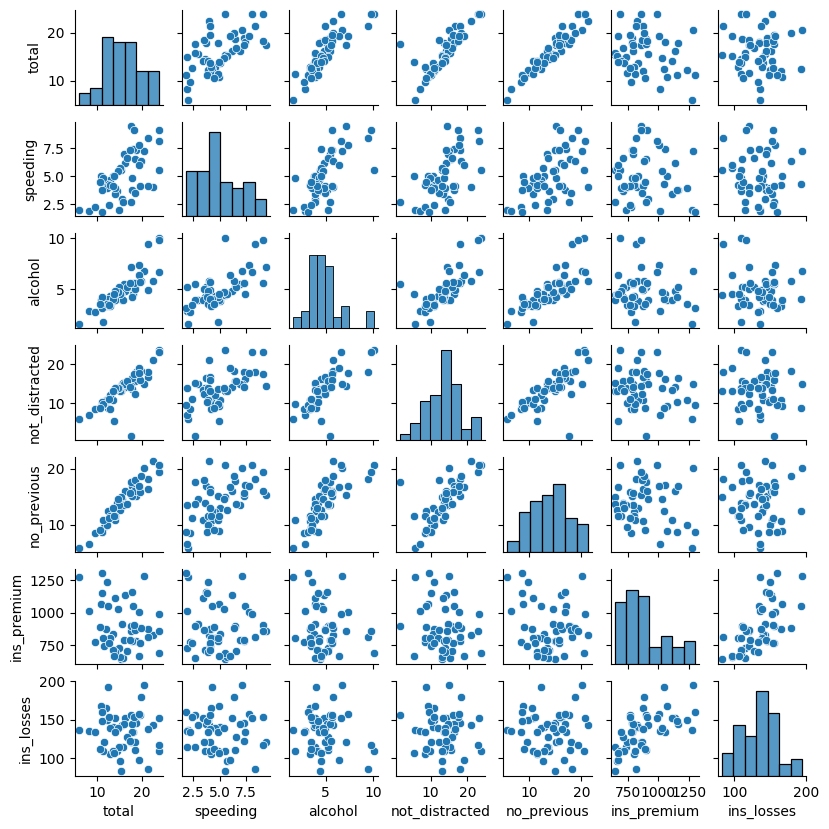

In [4]:
# Visualizamos la relación entre variables
sns.pairplot(data, height=1.2)

In [5]:
data.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


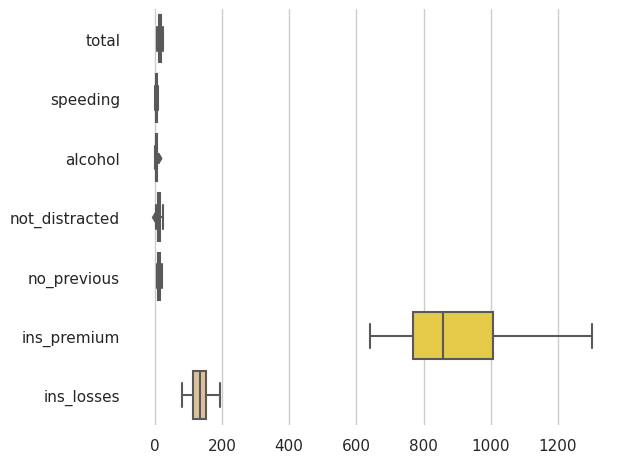

In [7]:
import matplotlib.pyplot as plt

#Eliminando columnas con valores mas altos
#columnas_a_eliminar = ['ins_premium', 'ins_losses',]
#data = data.drop(columnas_a_eliminar, axis=1)


# Crear el diagrama de caja
sns.set(style="whitegrid", palette="muted")
sns.boxplot(data=data, orient="h", palette="Set2")

# Ajustar la visualización del gráfico
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

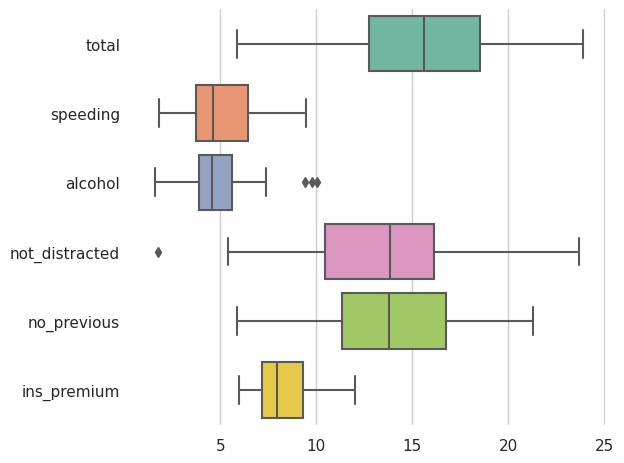

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Cargar los datos del dataset "car_crashes"
data = sns.load_dataset("car_crashes")

# Separando  los datos del dataset "car_crashes"
df1 = data.iloc[:,0:5]
data = data.iloc[:,-3:-1]

# Excluir las columnas no numéricas del conjunto de datos
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Escalar los datos utilizando MinMaxScaler
#scaler = MinMaxScaler()
scaler = MinMaxScaler(feature_range=(6, 12))
data_scaled = scaler.fit_transform(data_numeric)
data_scaled_df = pd.DataFrame(data_scaled, columns=data_numeric.columns)
# Unimos los Dataframes
data = pd.merge(df1, data_scaled_df[['ins_premium']], left_index=True, right_index=True)

#data =  pd.merge(df1, data_scaled_df[['ins_premium', 'ins_losses']])

# Crear el diagrama de caja
sns.set(style="whitegrid", palette="muted")
ax = sns.boxplot(data, orient="h", palette="Set2")

# Ajustar la visualización del gráfico
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Entrenando el Primer Modelo

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Variables Independiente (X), Dependiente (y)
X = data[["no_previous"]]
y = data["total"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Entrenamiento del modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluación del modelo
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación: ", r2)

Coeficiente de determinación:  0.9091644849569995


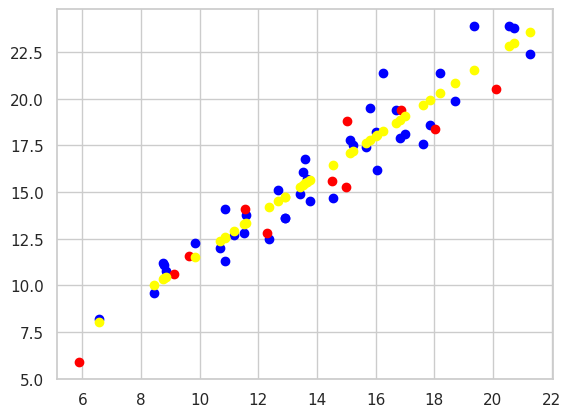

In [19]:
y_pred_train = reg.predict(X_train)
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_train, y_pred_train, color='yellow')  #'--', , linewidth=2

## Escalando los Datos

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargar los datos del dataset "car_crashes"
data = sns.load_dataset("car_crashes")

# Excluir las columnas no numéricas del conjunto de datos
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Escalar los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)
data_scaled_df = pd.DataFrame(data_scaled, columns=data_numeric.columns)

# Variables Independiente (X), Dependiente (y)
X = data_scaled_df[["alcohol"]]
y = data_scaled_df["total"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir los valores de la variable de salida (y) para los datos de prueba
y_pred = model.predict(X_test)

# Calcular el coeficiente de determinación R2
r2 = r2_score(y_test, y_pred)

print("El coeficiente de determinación R2 es:", r2)


El coeficiente de determinación R2 es: 0.7075997359497417


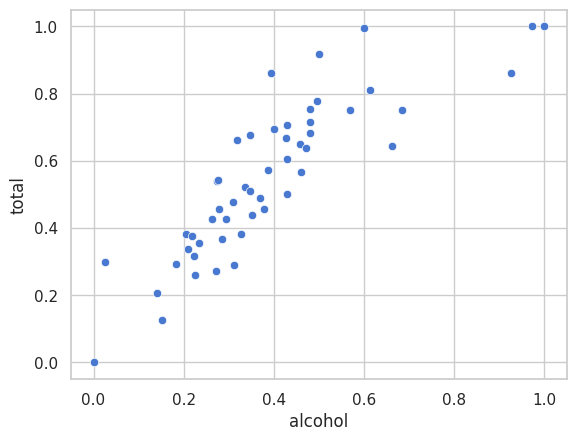

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con las variables "alcohol" y "accidentes"
#df = sns.load_dataset('car_crashes')[['alcohol', 'total']]

# Crear el gráfico scatterplot
sns.scatterplot(data=data_scaled_df, x='alcohol', y='total')

# Mostrar el gráfico
plt.show()

## Otras Metricas de Validación

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcular las predicciones del modelo para los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Calcular el error porcentual absoluto medio (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Crear un DataFrame con las métricas de evaluación
metrics_df = pd.DataFrame({'MSE': [mse], 'MAE': [mae], 'RMSE': [rmse], 'R2': [r2]})

metrics_df


,MSE,MAE,RMSE,R2
0,0.015011,0.103443,0.122521,0.7076
